<a href="https://colab.research.google.com/github/Gajalakshmisubramani/PRODIGY_ML_02/blob/main/customer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [80]:
data=pd.read_csv("/content/Mall_Customers.csv")
data['Gender']=data['Gender'].map({'Male': 0, 'Female': 1})
x=data.iloc[:,:]

In [81]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [83]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   cluster                 200 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 8.7 KB


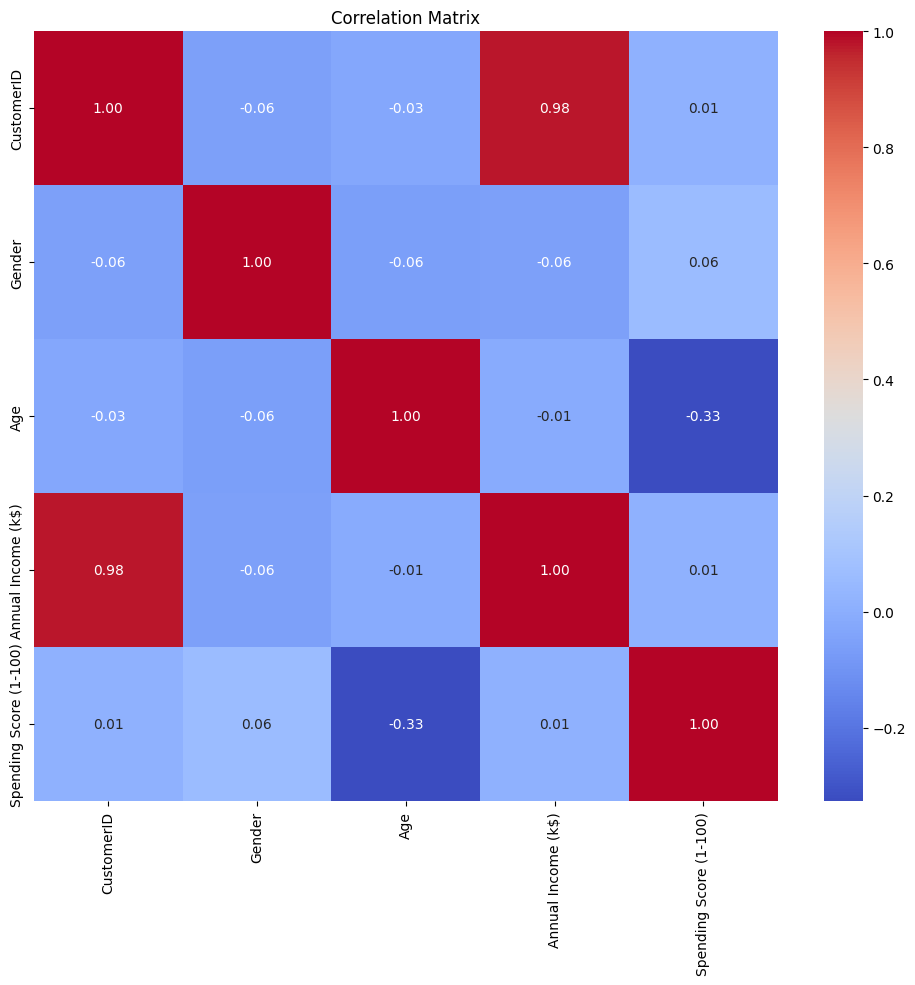

In [86]:
correlation_matrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

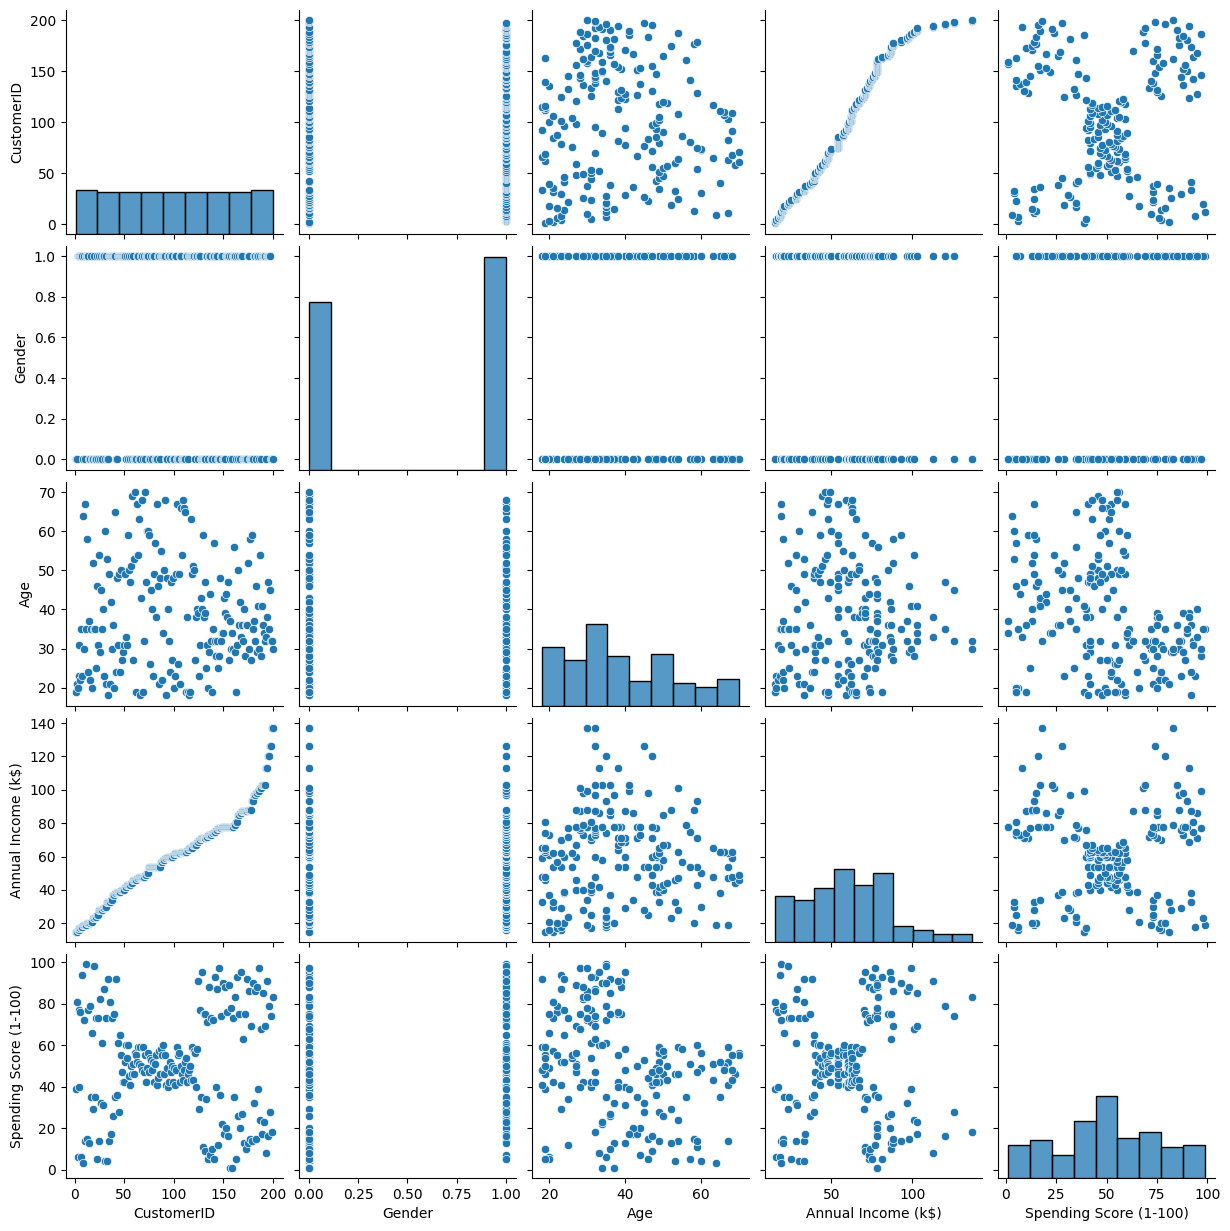

In [87]:
sns.pairplot(data)

In [54]:
scaler=StandardScaler()
x_stan=scaler.fit_transform(x)

k means clustering with elbow method

In [72]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x_stan)
    wcss.append(kmeans.inertia_)

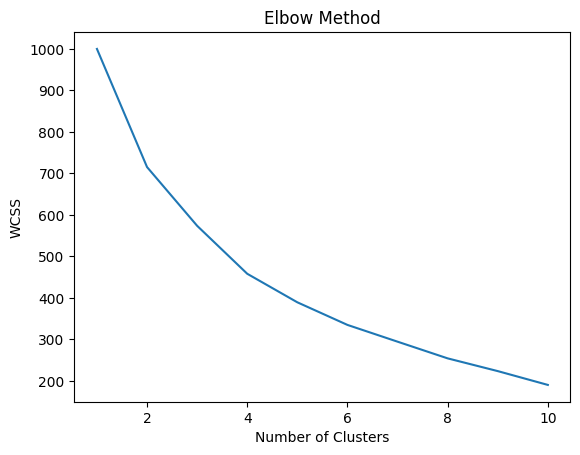

In [73]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
model=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
cluster=model.fit_predict(x_stan)

In [76]:
data['cluster']=cluster
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       0   19                  15                      39   
1             2       0   21                  15                      81   
2             3       1   20                  16                       6   
3             4       1   23                  16                      77   
4             5       1   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       1   35                 120                      79   
196         197       1   45                 126                      28   
197         198       0   32                 126                      74   
198         199       0   32                 137                      18   
199         200       0   30                 137                      83   

     cluster  
0          2  
1          2  
2          2  
3          2  
4          2

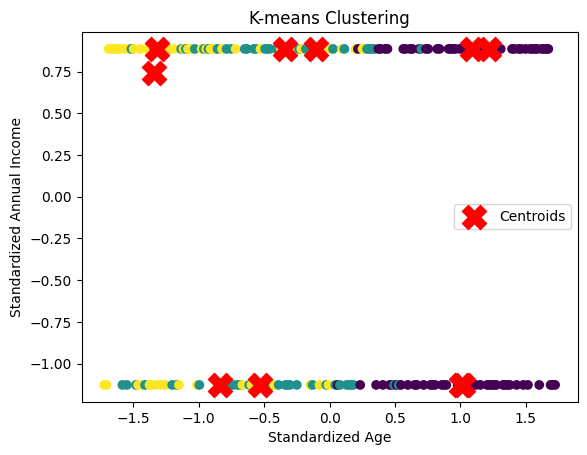

In [88]:
plt.scatter(x_stan[:, 0],x_stan[:, 1], c=cluster, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Annual Income')
plt.legend()
plt.show()